# Visualize COCO

Notebook to load and visualize the information in the coco dataset.

In [11]:
import os
import cv2
from pycocotools.coco import COCO
import ujson as json
import warnings
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt

In [150]:
# Specify the paths to the COCO dataset files
data_dir = "/home/maver02/Development/Datasets/COCO/"

train_dir = os.path.join(data_dir, 'train2017')
val_dir = os.path.join(data_dir, 'val2017')

annotations_dir = os.path.join(data_dir, 'annotations')

train_captions_dir = os.path.join(annotations_dir, 'captions_train2017.json')
val_captions_dir = os.path.join(annotations_dir, 'captions_val2017.json')

train_instances_dir = os.path.join(annotations_dir, 'instances_train2017.json')
val_instances_dir = os.path.join(annotations_dir, 'instances_val2017.json')

train_person_keypoints_dir = os.path.join(annotations_dir, 'person_keypoints_train2017.json')
val_person_keypoints_dir = os.path.join(annotations_dir, 'person_keypoints_val2017.json')

Select directory and Image id

In [151]:
# Select directory and image index in the next two lines
dataset_type = "val"
filename = "000000029393.jpg"

## Load and visualize images

In [129]:
def visualize_image(filename, data_dir, dataset_type):
    """
    Displays an image

    Args:
        filename (str): The name of the image file to visualize. E.g.: 000000353970.jpg
        data_dir (str): The location of the dataset
        dataset_type (str): Identify the location: either train or val

    Returns:
        None
    """
    if dataset_type == "train":
        image_path = os.path.join(data_dir, 'train2017', filename)
    elif dataset_type == "val":
        image_path = os.path.join(data_dir, 'val2017', filename)
    else: 
        print("input error")
        return
    
    image = cv2.imread(image_path)

    if image is None:
        print(f"Failed to load image for {filename}")
        return

    # Convert the image to RGB for display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image and mask side by side
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 1, 1)
    plt.imshow(image_rgb)
    plt.axis("off")

    plt.show()

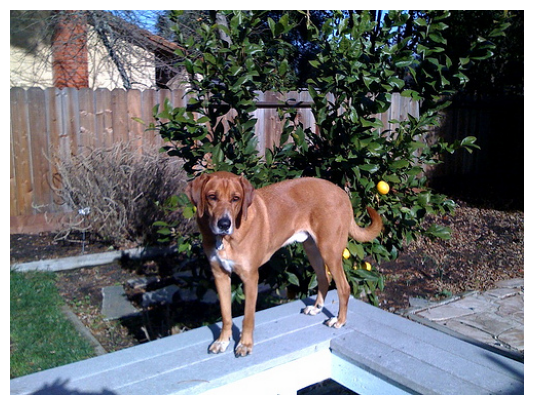

In [130]:
# Example: Visualize a few random images and masks from the validation set
visualize_image(filename, data_dir, dataset_type)

## Visualize captions 

In [76]:
# load json file with captions
with open(val_captions_dir, 'r') as file:
    val_captions_json = json.load(file)

In [77]:
val_captions_json.keys()

dict_keys(['info', 'licenses', 'images', 'annotations'])

In [78]:
val_captions_json['images'][:2]

[{'license': 4,
  'file_name': '000000397133.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
  'height': 427,
  'width': 640,
  'date_captured': '2013-11-14 17:02:52',
  'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
  'id': 397133},
 {'license': 1,
  'file_name': '000000037777.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000037777.jpg',
  'height': 230,
  'width': 352,
  'date_captured': '2013-11-14 20:55:31',
  'flickr_url': 'http://farm9.staticflickr.com/8429/7839199426_f6d48aa585_z.jpg',
  'id': 37777}]

In [80]:
val_captions_json['annotations'][:2]

[{'image_id': 179765,
  'id': 38,
  'caption': 'A black Honda motorcycle parked in front of a garage.'},
 {'image_id': 179765,
  'id': 182,
  'caption': 'A Honda motorcycle parked in a grass driveway'}]

In [131]:
def visualize_caption_information(filename, data_dir, dataset_type):
    """
    Displays an image caption

    Args:
        filename (str): The name of the image file to visualize. E.g.: 000000353970.jpg
        directory_path (str): Directory containing captions (either train or val)

    Returns:
        None
    """
    if dataset_type == "train":
        captions_path = os.path.join(data_dir, 'annotations', "captions_train2017.json")
    elif dataset_type == "val":
        captions_path = os.path.join(data_dir, 'annotations', "captions_val2017.json")
    else: 
        print("input error")
        return

    # load json file with captions
    with open(captions_path, 'r') as file:
        captions_dict = json.load(file)
    
    info = []

    # retrive the image metadata from caption location, and the id to find the caption, from the filename
    for image in captions_dict['images']:
        if image["file_name"] == filename:
            info = image
        else: 
            continue
    
    # retrieve the actual image caption with the id
    for annotation in captions_dict['annotations']:
        if annotation["image_id"] == info["id"]:
            info["caption"] = annotation["caption"]
            
    return info

In [132]:
visualize_caption_information(filename, data_dir, dataset_type)

{'license': 4,
 'file_name': '000000029393.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000029393.jpg',
 'height': 375,
 'width': 500,
 'date_captured': '2013-11-16 15:18:30',
 'flickr_url': 'http://farm3.staticflickr.com/2556/4228514131_81f3416db3_z.jpg',
 'id': 29393,
 'caption': 'A brown dog standing on a wooden bench near a lemon tree.'}

## Visualize Instances

In [107]:
# load json file with captions
with open(val_instances_dir, 'r') as file:
    val_instances_json = json.load(file)

In [108]:
val_instances_json.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [111]:
val_instances_json["images"][:1]

[{'license': 4,
  'file_name': '000000397133.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
  'height': 427,
  'width': 640,
  'date_captured': '2013-11-14 17:02:52',
  'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
  'id': 397133}]

In [113]:
val_instances_json["annotations"][:1]

[{'segmentation': [[510.66,
    423.01,
    511.72,
    420.03,
    510.45,
    416.0,
    510.34,
    413.02,
    510.77,
    410.26,
    510.77,
    407.5,
    510.34,
    405.16,
    511.51,
    402.83,
    511.41,
    400.49,
    510.24,
    398.16,
    509.39,
    397.31,
    504.61,
    399.22,
    502.17,
    399.64,
    500.89,
    401.66,
    500.47,
    402.08,
    499.09,
    401.87,
    495.79,
    401.98,
    490.59,
    401.77,
    488.79,
    401.77,
    485.39,
    398.58,
    483.9,
    397.31,
    481.56,
    396.35,
    478.48,
    395.93,
    476.68,
    396.03,
    475.4,
    396.77,
    473.92,
    398.79,
    473.28,
    399.96,
    473.49,
    401.87,
    474.56,
    403.47,
    473.07,
    405.59,
    473.39,
    407.71,
    476.68,
    409.41,
    479.23,
    409.73,
    481.56,
    410.69,
    480.4,
    411.85,
    481.35,
    414.93,
    479.86,
    418.65,
    477.32,
    420.03,
    476.04,
    422.58,
    479.02,
    422.58,
    480.29,
    423.01,
    4

In [136]:
val_instances_json["categories"][15:20]

[{'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},
 {'supercategory': 'animal', 'id': 19, 'name': 'horse'},
 {'supercategory': 'animal', 'id': 20, 'name': 'sheep'},
 {'supercategory': 'animal', 'id': 21, 'name': 'cow'}]

In [145]:
def visualize_instance_information(filename, data_dir, dataset_type):
    """
    Displays an image instance

    Args:
        filename (str): The name of the image file to visualize. E.g.: 000000353970.jpg
        data_dir (str): Directory containing data
        dataset_type (str): either train or val

    Returns:
        None
    """
    if dataset_type == "train":
        instances_path = os.path.join(data_dir, 'annotations', "instances_train2017.json")
    elif dataset_type == "val":
        instances_path = os.path.join(data_dir, 'annotations', "instances_val2017.json")
    else: 
        print("input error")
        return

    # load json file with captions
    with open(instances_path, 'r') as file:
        instances_dict = json.load(file)
    
    info = []

    # retrive the image metadata from instances location, and the id to find the caption, from the filename
    for image in instances_dict['images']:
        if image["file_name"] == filename:
            info = image
        else: 
            continue
    
    # retrieve segmentation, and box data, by matching id
    for annotation in instances_dict['annotations']:
        if annotation["image_id"] == info["id"]:
            for key in annotation.keys():
                info[key] = annotation[key]
    
    # extract the information related to the category from the category_id
    for category in instances_dict['categories']:
        if category["id"] == info["category_id"]:
            for key in category.keys():
                info[key] = category[key]
            
    return info

In [144]:
visualize_instance_information(filename, data_dir, dataset_type)

{'supercategory': 'animal', 'id': 18, 'name': 'dog'}


{'license': 4,
 'file_name': '000000029393.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000029393.jpg',
 'height': 375,
 'width': 500,
 'date_captured': '2013-11-16 15:18:30',
 'flickr_url': 'http://farm3.staticflickr.com/2556/4228514131_81f3416db3_z.jpg',
 'id': 18,
 'segmentation': [[192.81,
   333.63,
   193.57,
   327.56,
   202.68,
   316.93,
   204.96,
   289.6,
   193.57,
   253.16,
   188.26,
   232.67,
   187.5,
   217.48,
   182.95,
   203.82,
   180.67,
   194.71,
   173.84,
   183.32,
   170.04,
   175.73,
   170.8,
   168.14,
   183.7,
   160.55,
   197.37,
   157.52,
   214.83,
   158.27,
   223.18,
   160.55,
   226.97,
   159.79,
   233.81,
   168.14,
   245.19,
   180.29,
   248.23,
   171.18,
   274.8,
   165.11,
   302.13,
   163.59,
   321.1,
   172.7,
   332.49,
   181.81,
   337.04,
   195.47,
   337.04,
   208.38,
   346.91,
   211.41,
   350.71,
   206.1,
   348.43,
   194.71,
   348.43,
   190.92,
   359.82,
   199.27,
   365.13,
   209.89,
   3

## Person Keypoints

In [152]:
# load json file with captions
with open(val_person_keypoints_dir, 'r') as file:
    val_person_keypoints_json = json.load(file)

In [153]:
val_person_keypoints_json.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [154]:
val_person_keypoints_json['images'][:1]

[{'license': 4,
  'file_name': '000000397133.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
  'height': 427,
  'width': 640,
  'date_captured': '2013-11-14 17:02:52',
  'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
  'id': 397133}]

In [155]:
val_person_keypoints_json['annotations'][:1]

[{'segmentation': [[125.12,
    539.69,
    140.94,
    522.43,
    100.67,
    496.54,
    84.85,
    469.21,
    73.35,
    450.52,
    104.99,
    342.65,
    168.27,
    290.88,
    179.78,
    288,
    189.84,
    286.56,
    191.28,
    260.67,
    202.79,
    240.54,
    221.48,
    237.66,
    248.81,
    243.42,
    257.44,
    256.36,
    253.12,
    262.11,
    253.12,
    275.06,
    299.15,
    233.35,
    329.35,
    207.46,
    355.24,
    206.02,
    363.87,
    206.02,
    365.3,
    210.34,
    373.93,
    221.84,
    363.87,
    226.16,
    363.87,
    237.66,
    350.92,
    237.66,
    332.22,
    234.79,
    314.97,
    249.17,
    271.82,
    313.89,
    253.12,
    326.83,
    227.24,
    352.72,
    214.29,
    357.03,
    212.85,
    372.85,
    208.54,
    395.87,
    228.67,
    414.56,
    245.93,
    421.75,
    266.07,
    424.63,
    276.13,
    437.57,
    266.07,
    450.52,
    284.76,
    464.9,
    286.2,
    479.28,
    291.96,
    489.35,
    310.

In [161]:
val_person_keypoints_json['categories']

[{'supercategory': 'person',
  'id': 1,
  'name': 'person',
  'keypoints': ['nose',
   'left_eye',
   'right_eye',
   'left_ear',
   'right_ear',
   'left_shoulder',
   'right_shoulder',
   'left_elbow',
   'right_elbow',
   'left_wrist',
   'right_wrist',
   'left_hip',
   'right_hip',
   'left_knee',
   'right_knee',
   'left_ankle',
   'right_ankle'],
  'skeleton': [[16, 14],
   [14, 12],
   [17, 15],
   [15, 13],
   [12, 13],
   [6, 12],
   [7, 13],
   [6, 7],
   [6, 8],
   [7, 9],
   [8, 10],
   [9, 11],
   [2, 3],
   [1, 2],
   [1, 3],
   [2, 4],
   [3, 5],
   [4, 6],
   [5, 7]]}]

In [176]:
def visualize_person_keypoints_information(filename, data_dir, dataset_type):
    """
    Displays an image person keypoints

    Args:
        filename (str): The name of the image file to visualize. E.g.: 000000353970.jpg
        data_dir (str): Directory containing data
        dataset_type (str): either train or val

    Returns:
        None
    """
    if dataset_type == "train":
        person_keypoints_path = os.path.join(data_dir, 'annotations', "person_keypoints_train2017.json")
    elif dataset_type == "val":
        person_keypoints_path = os.path.join(data_dir, 'annotations', "person_keypoints_val2017.json")
    else: 
        print("input error")
        return

    # load json file with captions
    with open(person_keypoints_path, 'r') as file:
        person_keypoints_dict = json.load(file)
    
    info = []

    # retrive the image metadata from instances location, and the id to find the caption, from the filename
    for image in person_keypoints_dict['images']:
        if image["file_name"] == filename:
            info = image
        else: 
            continue
    
    flag_contains_a_person = False
    # retrieve segmentation, and box data, by matching id
    for annotation in person_keypoints_dict['annotations']:
        if annotation["image_id"] == info["id"]:
            flag_contains_a_person = True
            for key in annotation.keys():
                info[key] = annotation[key]
    
    if flag_contains_a_person:
        # extract the information related to the category from the category_id
        for key in person_keypoints_dict['categories'][0].keys():
            info[key] = person_keypoints_dict['categories'][0][key]
            
    return info

In [177]:
visualize_person_keypoints_information(filename, data_dir, dataset_type)

{'license': 4,
 'file_name': '000000029393.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000029393.jpg',
 'height': 375,
 'width': 500,
 'date_captured': '2013-11-16 15:18:30',
 'flickr_url': 'http://farm3.staticflickr.com/2556/4228514131_81f3416db3_z.jpg',
 'id': 29393}

# Recap

In [193]:
# Select directory and image index in the next two lines
dataset_type = "val"
filename = "000000321214.jpg"

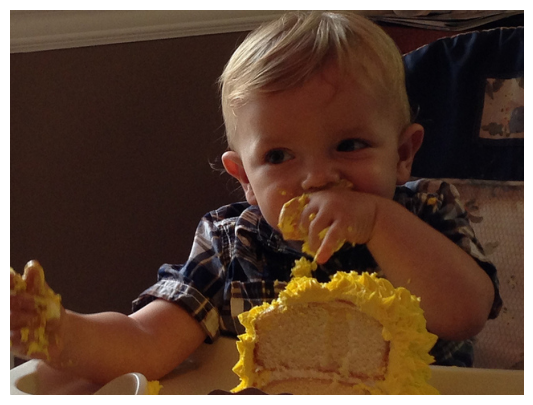

In [194]:
# Example: Visualize a few random images and masks from the validation set
visualize_image(filename, data_dir, dataset_type)

In [195]:
visualize_caption_information(filename, data_dir, dataset_type)

{'license': 4,
 'file_name': '000000321214.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000321214.jpg',
 'height': 480,
 'width': 640,
 'date_captured': '2013-11-20 22:11:08',
 'flickr_url': 'http://farm9.staticflickr.com/8030/8037209348_6491cf571e_z.jpg',
 'id': 321214,
 'caption': 'Baby boy at the table eating cake frosting off his hand.'}

In [196]:
visualize_instance_information(filename, data_dir, dataset_type)

{'license': 4,
 'file_name': '000000321214.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000321214.jpg',
 'height': 480,
 'width': 640,
 'date_captured': '2013-11-20 22:11:08',
 'flickr_url': 'http://farm9.staticflickr.com/8030/8037209348_6491cf571e_z.jpg',
 'id': 1,
 'segmentation': [[2.15,
   324.07,
   15.07,
   326.22,
   16.14,
   314.39,
   26.91,
   309.0,
   39.82,
   314.39,
   43.05,
   324.07,
   60.27,
   350.98,
   75.34,
   372.5,
   97.94,
   377.88,
   128.07,
   376.81,
   147.44,
   380.04,
   154.98,
   359.59,
   173.27,
   335.91,
   189.42,
   316.54,
   207.71,
   314.39,
   216.32,
   304.7,
   241.08,
   250.89,
   266.91,
   244.43,
   294.89,
   232.59,
   267.98,
   202.46,
   260.45,
   178.78,
   262.6,
   175.55,
   257.22,
   101.29,
   260.45,
   71.16,
   286.28,
   36.72,
   314.26,
   13.04,
   347.62,
   8.74,
   427.26,
   5.51,
   454.17,
   15.19,
   496.14,
   50.71,
   497.22,
   108.83,
   519.82,
   154.03,
   519.82,
   157.26

In [197]:
visualize_person_keypoints_information(filename, data_dir, dataset_type)

{'license': 4,
 'file_name': '000000321214.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000321214.jpg',
 'height': 480,
 'width': 640,
 'date_captured': '2013-11-20 22:11:08',
 'flickr_url': 'http://farm9.staticflickr.com/8030/8037209348_6491cf571e_z.jpg',
 'id': 1,
 'segmentation': [[2.15,
   324.07,
   15.07,
   326.22,
   16.14,
   314.39,
   26.91,
   309,
   39.82,
   314.39,
   43.05,
   324.07,
   60.27,
   350.98,
   75.34,
   372.5,
   97.94,
   377.88,
   128.07,
   376.81,
   147.44,
   380.04,
   154.98,
   359.59,
   173.27,
   335.91,
   189.42,
   316.54,
   207.71,
   314.39,
   216.32,
   304.7,
   241.08,
   250.89,
   266.91,
   244.43,
   294.89,
   232.59,
   267.98,
   202.46,
   260.45,
   178.78,
   262.6,
   175.55,
   257.22,
   101.29,
   260.45,
   71.16,
   286.28,
   36.72,
   314.26,
   13.04,
   347.62,
   8.74,
   427.26,
   5.51,
   454.17,
   15.19,
   496.14,
   50.71,
   497.22,
   108.83,
   519.82,
   154.03,
   519.82,
   157.26,
